<ipython-input-9-769eb52d1420>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[column] = label_encoders[column].fit_transform(X_train[column])
<ipython-input-9-769eb52d1420>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[column] = label_encoders[column].fit_transform(X_test[column])


Mean Squared Error: 95.88142438266722
R^2 Score: 0.4563839034719316


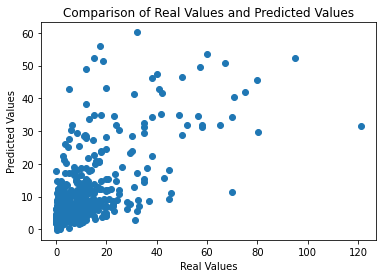

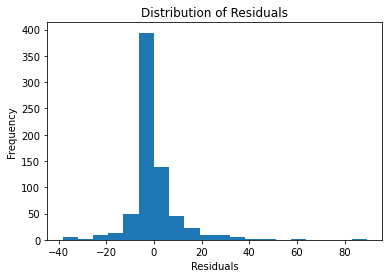

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
###Train con 2012-2021/ test con 2022
# Load the dataset from the CSV files
train_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/transfers45train.csv")
test_data = pd.read_csv("C:/Users/Utente/Desktop/cakio/dcereijo-player-scores/data/transfers35test.csv")

# Select the columns to be used as features (independent variables)
features = [ 'Overall_club_name','Overall_club_involved', 'league_destination', 'age', 'club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'OverallSeasonClub', 'OverallSeasonClub2']

X_train = train_data[features]
X_test = test_data[features]

# Select the target variable (dependent variable)
y_train = train_data['fee_cleaned']
y_test = test_data['fee_cleaned']

# Create a dictionary to store LabelEncoder objects
label_encoders = {}

# Encode the categorical variables
for column in X_train.select_dtypes(include=['object']):
    label_encoders[column] = LabelEncoder()
    X_train[column] = label_encoders[column].fit_transform(X_train[column])
    X_test[column] = label_encoders[column].fit_transform(X_test[column])

# Create and train the GBM model
model = GradientBoostingRegressor(random_state=190)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Plot predicted values against real values
plt.scatter(y_test, y_pred)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Real Values and Predicted Values')
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


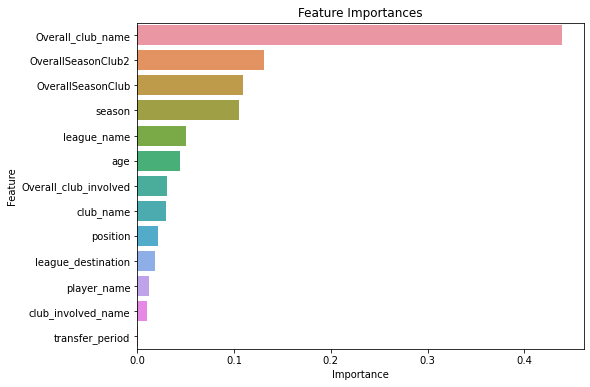

                  Feature  Importance
0       Overall_club_name    0.439410
12     OverallSeasonClub2    0.130470
11      OverallSeasonClub    0.109056
10                 season    0.105372
9             league_name    0.049942
3                     age    0.043739
1   Overall_club_involved    0.030237
4               club_name    0.029333
6                position    0.021286
2      league_destination    0.018726
5             player_name    0.011671
7      club_involved_name    0.010435
8         transfer_period    0.000324


In [10]:
# Get the feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the feature importances table
print(feature_importances)


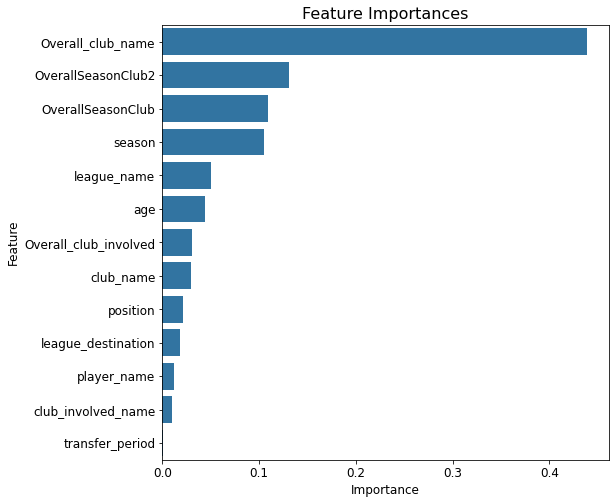

                  Feature  Importance
0       Overall_club_name    0.439410
12     OverallSeasonClub2    0.130470
11      OverallSeasonClub    0.109056
10                 season    0.105372
9             league_name    0.049942
3                     age    0.043739
1   Overall_club_involved    0.030237
4               club_name    0.029333
6                position    0.021286
2      league_destination    0.018726
5             player_name    0.011671
7      club_involved_name    0.010435
8         transfer_period    0.000324


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the feature importances from the trained model
importances = model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, color=sns.color_palette('tab10')[0])

plt.title('Feature Importances', fontsize=16)  # Increase font size to 16
plt.xlabel('Importance', fontsize=12)  # Increase font size to 12
plt.ylabel('Feature', fontsize=12)  # Increase font size to 12

plt.xticks(fontsize=12)  # Increase font size of x-axis tick labels to 10
plt.yticks(fontsize=12)  # Increase font size of y-axis tick labels to 10

plt.show()

# Display the feature importances table
print(feature_importances)



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, r2_score

# Carica i dati di addestramento e test
train_data = pd.read_csv("transfers45train.csv")
test_data = pd.read_csv("transfers35test.csv")

# Seleziona le caratteristiche numeriche e categoriche
numeric_features = ['age', 'OverallSeasonClub', 'OverallSeasonClub2', 'Overall_club_name', 'Overall_club_involved']
categorical_features = ['club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'league_destination']

# Seleziona la variabile target
target = 'fee_cleaned'

# Dividi il dataset in caratteristiche e variabile target per addestramento
X_train_numeric = train_data[numeric_features]
X_train_categorical = train_data[categorical_features]
y_train = train_data[target]

# Dividi il dataset in caratteristiche e variabile target per il test
X_test_numeric = test_data[numeric_features]
X_test_categorical = test_data[categorical_features]
y_test = test_data[target]

# Codifica le caratteristiche categoriche
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train_categorical))
X_train_encoded.columns = encoder.get_feature_names(categorical_features)

X_test_encoded = pd.DataFrame(encoder.transform(X_test_categorical))
X_test_encoded.columns = encoder.get_feature_names(categorical_features)


# Concatena le caratteristiche numeriche con quelle codificate per addestramento
X_train = pd.concat([X_train_numeric, X_train_encoded], axis=1)

# Concatena le caratteristiche numeriche con quelle codificate per il test
X_test = pd.concat([X_test_numeric, X_test_encoded], axis=1)

# Crea il modello XGBoost con i parametri desiderati
xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8,
                             colsample_bytree=1.0, reg_alpha=0, reg_lambda=0.1)

# Addestra il modello
xgb_model.fit(X_train, y_train)

# Fai le previsioni sul set di test utilizzando il modello addestrato
y_pred = xgb_model.predict(X_test)

# Calcola le metriche di valutazione
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

print("Explained Variance Score:", evs)
print("R-squared:", r2)



C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Utente\anaconda4\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0, 1, 3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Utente\anaconda4\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Mean Squared Error: 89.44502301646614
Mean Absolute Error: 4.8638283384460905
Explained Variance Score: 0.5281718753332936
R-squared: 0.49287617931065675


In [7]:
# Get the feature importances from the trained model
importances = xgb_model.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the top 10 feature importances
print(feature_importances.head(10))


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, r2_score

# Carica i dataset di addestramento e test
train_data = pd.read_csv("transfers45train.csv")
test_data = pd.read_csv("transfers35test.csv")

# Seleziona le feature che desideri utilizzare per la regressione
features = ['age', 'OverallSeasonClub', 'OverallSeasonClub2', 'Overall_club_name', 'Overall_club_involved']

# Seleziona la variabile target
target = 'fee_cleaned'

# Dividi i dataset in caratteristiche e variabile target
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Codifica le caratteristiche categoriche
cat_features = ['club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season', 'league_destination']
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(train_data[cat_features]))
X_train_encoded.columns = encoder.get_feature_names(cat_features)
X_test_encoded = pd.DataFrame(encoder.transform(test_data[cat_features]))
X_test_encoded.columns = encoder.get_feature_names(cat_features)

# Concatena le caratteristiche codificate con quelle numeriche
X_train = pd.concat([X_train, X_train_encoded], axis=1)
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Crea il modello XGBoost con i parametri predefiniti
xgb_model = xgb.XGBRegressor()

# Addestra il modello
xgb_model.fit(X_train, y_train)

# Fai le previsioni sul set di test utilizzando il modello addestrato
y_pred = xgb_model.predict(X_test)

import numpy as np

# Applica una trasformazione logaritmica ai valori target
y_test = np.abs(y_test)
y_pred = np.abs(y_pred)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Log Error:", msle)
print("Explained Variance Score:", evs)
print("R-squared:", r2)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, r2_score

# Carica il dataset di addestramento e test
train_data = pd.read_csv("transfers45train.csv")
test_data = pd.read_csv("transfers35test.csv")

# Seleziona le feature che desideri utilizzare per la regressione
features = ['age', 'OverallSeasonClub', 'OverallSeasonClub2', 'Overall_club_name', 'Overall_club_involved']

# Seleziona la variabile target
target = 'fee_cleaned'

# Dividi il dataset di addestramento in caratteristiche e variabile target
X_train = train_data[features]
y_train = train_data[target]

# Dividi il dataset di test in caratteristiche e variabile target
X_test = test_data[features]
y_test = test_data[target]

# Codifica le caratteristiche categoriche
cat_features = ['club_name', 'player_name', 'position', 'club_involved_name', 'transfer_period', 'league_name', 'season','league_destination']
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(train_data[cat_features]))
X_train_encoded.columns = encoder.get_feature_names(cat_features)

X_test_encoded = pd.DataFrame(encoder.transform(test_data[cat_features]))
X_test_encoded.columns = encoder.get_feature_names(cat_features)

# Concatena le caratteristiche codificate con quelle numeriche per il set di addestramento
X_train = pd.concat([X_train, X_train_encoded], axis=1)

# Concatena le caratteristiche codificate con quelle numeriche per il set di test
X_test = pd.concat([X_test, X_test_encoded], axis=1)

# Crea il modello XGBoost
xgb_model = xgb.XGBRegressor()

# Definisci i parametri per la griglia di ricerca
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Crea l'oggetto per la griglia di ricerca
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Esegui la griglia di ricerca per trovare i migliori parametri
grid_search.fit(X_train, y_train)

# Ottieni i parametri ottimali
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Addestra il modello con i parametri ottimali
xgb_model = xgb.XGBRegressor(**best_params)
xgb_model.fit(X_train, y_train)

# Fai le previsioni sul set di test utilizzando il modello addestrato
y_pred = xgb_model.predict(X_test)

# Calcola le metriche di valutazione
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Mean Squared Log Error:", msle)
print("Explained Variance Score:", evs)
print("R-squared:", r2)
